### EDA Demo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Demo Dataset with some data modification to show features of the tool.

In [2]:
df = pd.read_csv('chronic_kidney_disease.csv')

data = """05/10/2001; 05/10/01; 5/10/09; 6/2/01
May-10-2001; May 10, 2010; March 25, 2001; Mar. 25, 2001; Mar 25 2001;
25 Mar 2001; 25 March 2001; 25 Mar. 2001; 25 March, 2001
Mar 25th, 2001; Mar 25th, 2001; Mar 12nd, 2001
Feb 2001; Sep 2001; Oct 2001
5/2001; 11/2001
2001; 2015 5"""

data = data.replace('\n',';').split(';')
df['Date'] = pd.Series([data[np.random.randint(0,len(data))] for _ in range(df.shape[0])])



df['aged']=df['age']

df.rename(columns = {"aged":"age"},inplace=True)


In [3]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,rc,htn,dm,cad,appet,pe,ane,class,Date,age
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,5.2,yes,yes,no,good,no,no,ckd,"Mar 25th, 2001",48
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,?,no,no,no,good,no,no,ckd,May-10-2001,7
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,?,no,yes,no,poor,no,yes,ckd,"Mar. 25, 2001",62
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,3.9,yes,no,no,poor,yes,yes,ckd,2001,48
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,4.6,no,no,no,good,no,no,ckd,6/2/01,51


In [4]:
from dataanalyser.eda import Preprocessing,Imputation,Testing,Visual,Outlier

In [ ]:
Preprocessing(df).automate()

Number of rows:  400 	 Number of columns:  27
		**Preprocessing**

bp  converted from str to  int
sg  converted from str to  float
al  converted from str to  int
su  converted from str to  int
bgr  converted from str to  int
bu  converted from str to  int
sc  converted from str to  float
hemo  converted from str to  float
pcv  converted from str to  int
Date  converted from str to datetime
Number of rows:  400 	 Number of columns:  27

******************************
		**Columns Information**
Note: Numeric_variables having less than 10 distinct values are regarded as categoric
numeric :	 10
categoric :	 14
datetime :	 1
problem_in_detecting_dtype :	 2
numeric :	 ['bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
categoric :	 ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
datetime :	 ['Date']
problem_in_detecting_dtype :	 ['age', 'age']
		**Data Information**


'Data Info failed: \nProblem with Column names -- Check for duplicate column names'

		**Dataset**


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,rc,htn,dm,cad,appet,pe,ane,class,Date,age
0,48,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,5.2,yes,yes,no,good,no,no,ckd,2001-03-25,48
1,7,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,NaN,no,no,no,good,no,no,ckd,2001-05-10,7
2,62,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,NaN,no,yes,no,poor,no,yes,ckd,2001-03-25,62
3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,3.9,yes,no,no,poor,yes,yes,ckd,2001-01-01,48
4,51,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,4.6,no,no,no,good,no,no,ckd,2001-06-02,51


		**Description of Numeric Variables**


,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


		**Description of Categoric Variables**


,age,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class,Date,age
count,400,248,335,396,396,398,398,398,399,399,399,400,387,400
unique,77,2,2,2,2,2,3,2,2,2,2,2,13,77
top,60,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd,2001-03-25 00:00:00,60
freq,19,201,259,354,374,251,261,364,317,323,339,250,140,19
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01 00:00:00,NaN


		**Dropping Duplicates**

Duplicate rows detected:  0
Rows removed:  0
Columns with duplicate names
['age']


,age,age
0,48,48
1,7,7
2,62,62
3,48,48
4,51,51
...,...,...
395,55,55
396,42,42
397,12,12
398,17,17


Drop columns with duplicate names(y or n):  y


In [6]:
df.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,rc,htn,dm,cad,appet,pe,ane,class,Date,age
0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,...,5.2,yes,yes,no,good,no,no,ckd,2001-02-01,48.0
1,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,...,NaN,no,no,no,good,no,no,ckd,2001-03-25,7.0
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,...,NaN,no,yes,no,poor,no,yes,ckd,2015-05-01,62.0
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,...,3.9,yes,no,no,poor,yes,yes,ckd,2010-05-10,48.0
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,...,4.6,no,no,no,good,no,no,ckd,2001-03-25,51.0


		**Pairplot**
Note: Numeric_variables having less than 10 distinct values are regarded as categoric


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


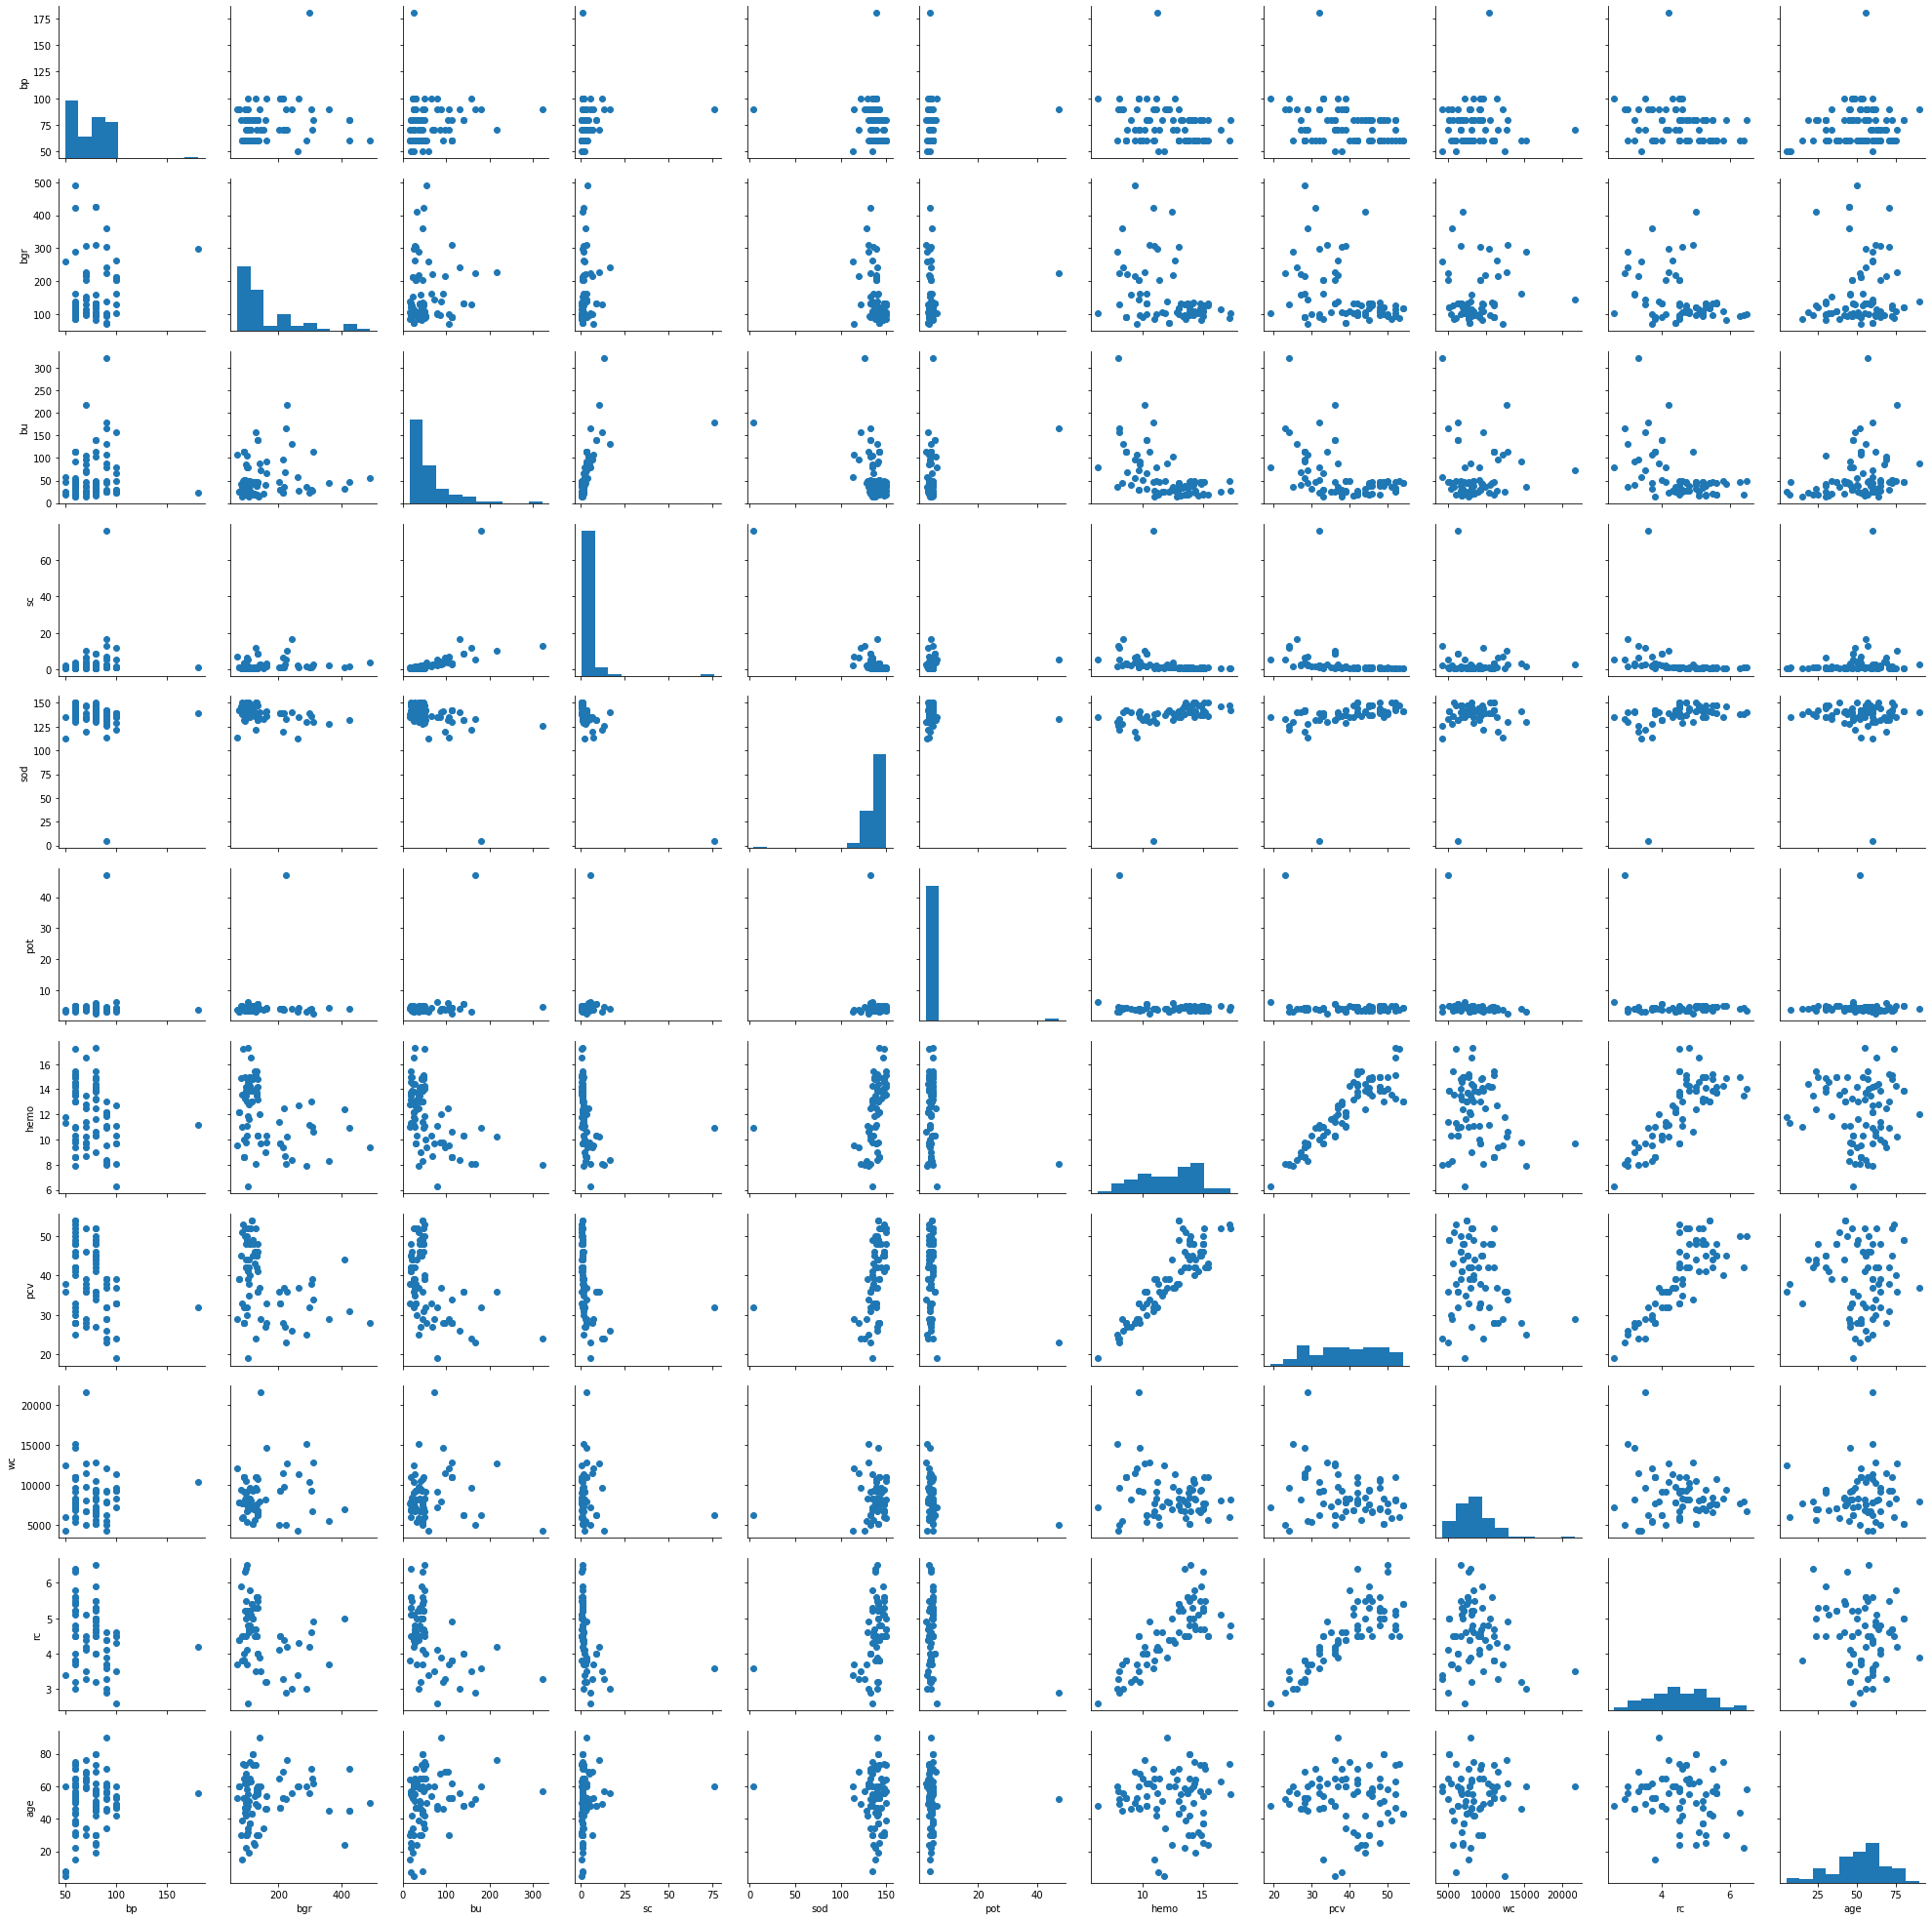

<Figure size 432x288 with 0 Axes>

		**Correlation Ceofficient**


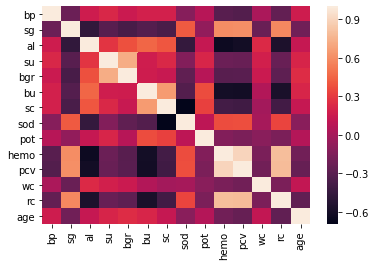

		**Distribution of all columns**


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:3

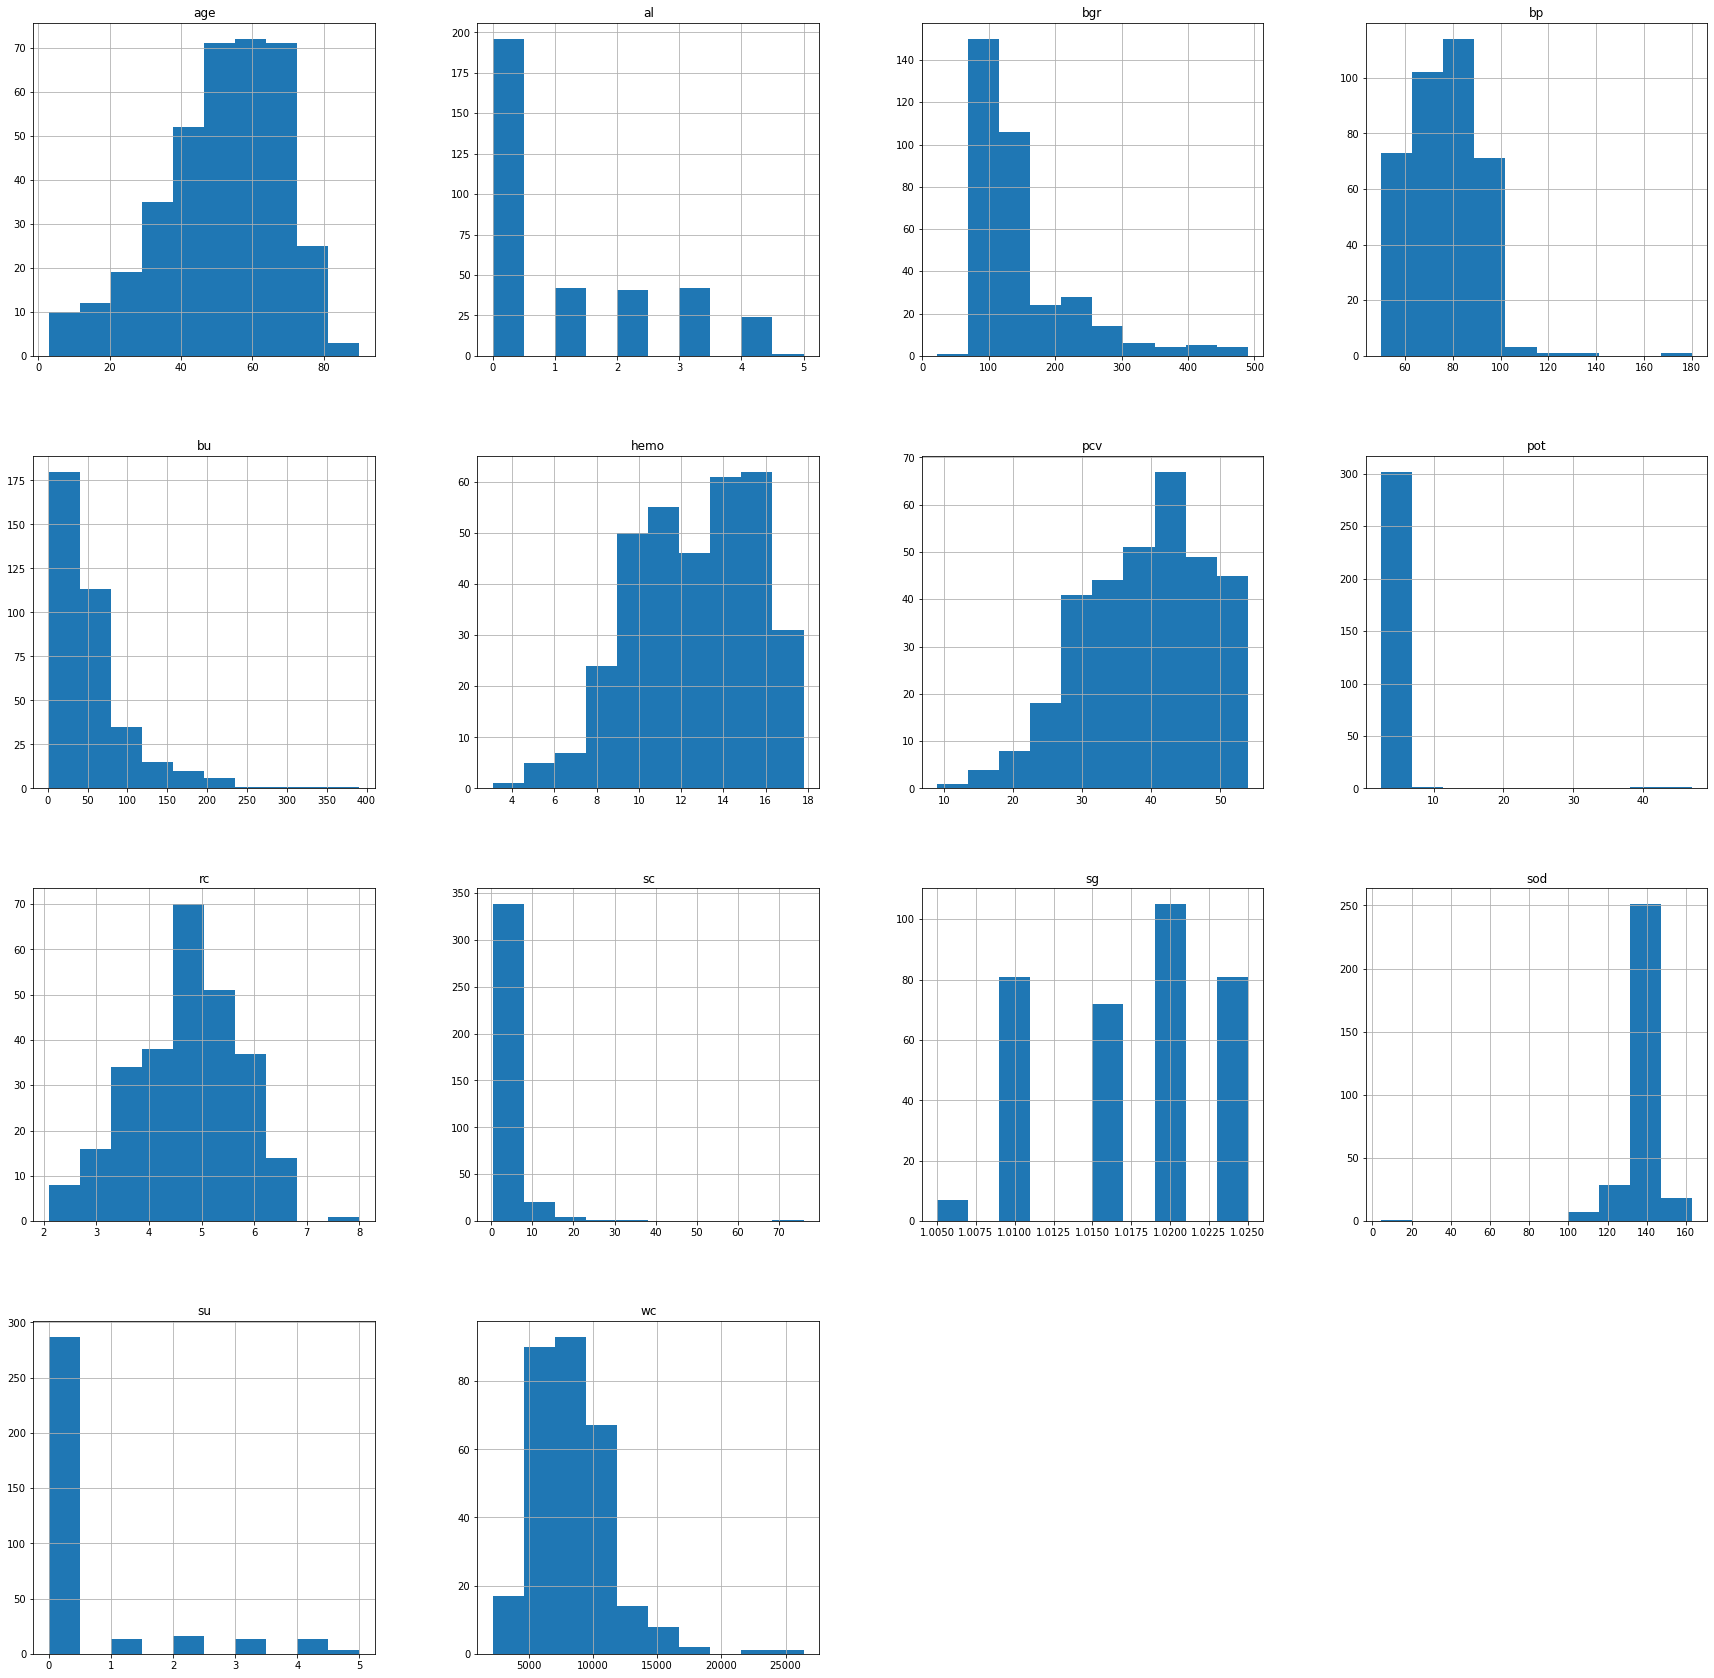

In [7]:
Visual(df).automate()

In [8]:
Outlier(df).automate()

		**Outlier Detection**

Outliers will be detected for all numeric variables
Method used to detect outliers  iqr
Other methods: zscore,iqr


Detect Outliers(y or n c to change method) y


,iqr,left-outliers,left-min,right_outliers,right-max
bp,55.0--95.0,5,50,30,180
al,-3.0--5.0,0,NaN,1,5
su,0.0--0.0,287,0,345,5
bgr,5.25--255.25,0,NaN,33,490
bu,-31.75--122.25,0,NaN,35,391
sc,-1.9499999999999997--5.6499999999999995,0,NaN,45,76
sod,124.5--152.5,15,4.5,1,163
pot,2.149999999999999--6.550000000000001,0,NaN,4,47
hemo,3.500000000000001--21.9,1,3.1,0,NaN
pcv,12.5--64.5,1,9,0,NaN


Number of rows:  377 	 Number of columns:  26

******************************


In [9]:
Imputation(df).automate()

		**Imputing Columns**

All columns having null values will be imputed. To impute specific columns pass columns = [] when calling the method
Columns to be imputed
['bp' 'sg' 'al' 'su' 'rbc' 'pc' 'pcc' 'ba' 'bgr' 'bu' 'sc' 'sod' 'pot'
 'hemo' 'pcv' 'wc' 'rc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane' 'class' 'Date'
 'age']
Method for imputing numeric variables: median,mean,interpolate
Method for imputing categoric variables: mode,missing(replace nan by "missing")
Other options: bfill,ffill


Impute(y or n c to change method: ) y


Imputed Columns:  ['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class', 'Date', 'age']
Number of rows:  377 	 Number of columns:  26

******************************


In [10]:
Testing(df).automate()

		**Normality Testing**

Note: Numeric_variables having less than 10 distinct values are regarded as categoric


,statistic,p-value
bp,166.321290,7.652277e-37
bgr,181.872279,3.213190e-40
bu,247.298313,1.994590e-54
sc,587.579906,2.562386e-128
sod,571.763166,6.969570e-125
pot,731.605881,1.360822e-159
hemo,9.022608,1.098413e-02
pcv,15.405810,4.515135e-04
wc,185.498457,5.242299e-41
rc,12.701617,1.745335e-03
